<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_8_Phylogenetic_Analysis_of_Acidomyces_acidothermus_Isolates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.2 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install mafft

Extracting templates from packages: 100%
Selecting previously unselected package fonts-lato.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../00-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package libclone-perl.
Preparing to unpack .../02-libclone-perl_0.45-1build3_amd64.deb ...
Unpacking libclone-perl (0.45-1build3) ...
Selecting previously unselected package libdata-dump-perl.
Preparing to unpack .../03-libdata-dump-perl_1.25-1_all.deb ...
Unpacking libdata-dump-perl (1.25-1) ...
Selecting previously unselected package libencode-locale-perl.
Preparing to unpack .../04-libencode-locale-perl_1.05-1.1_all.deb ...
Unpacking libencode-locale-perl (1.05-1.1) ...
Selecting previously unselected package libhttp-date-perl.
Preparing to unpack .../05-libhttp-date-perl

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "your.email@example.com"
ids = ["PX448098.1", "PX448096.1", "PX448097.1"]

handle = Entrez.efetch(
    db="nucleotide",
    id=",".join(ids),
    rettype="fasta",
    retmode="text"
)

records = list(SeqIO.parse(handle, "fasta"))
handle.close()

rename_map = {
    "PX448096.1": "Acidomyces_acidothermus_NN-417",
    "PX448097.1": "Acidomyces_acidothermus_NN-436",
    "PX448098.1": "Acidomyces_acidothermus_NN-433"
}

for record in records:
    record.id = rename_map.get(record.id, record.id)
    record.name = record.id
    record.description = ""

SeqIO.write(records, "sequences_renamed.fasta", "fasta")

3

In [ ]:
import subprocess
from Bio import AlignIO

result = subprocess.run(
    ["mafft", "sequences_renamed.fasta"],
    capture_output=True,
    text=True
)

with open("aligned.fasta", "w") as f:
    f.write(result.stdout)

alignment = AlignIO.read("aligned.fasta", "fasta")

UPGMA


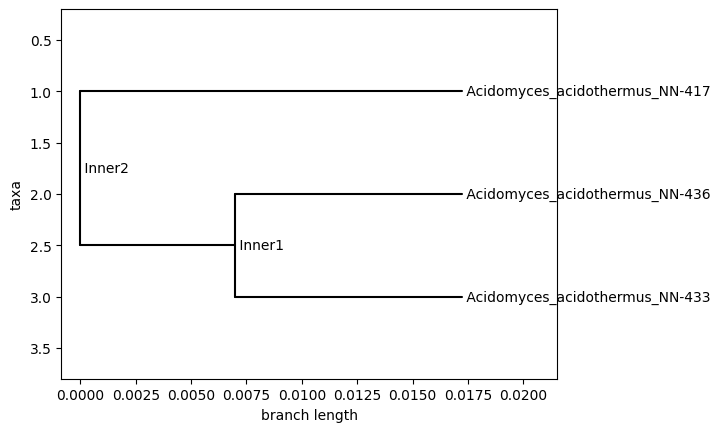

NJ


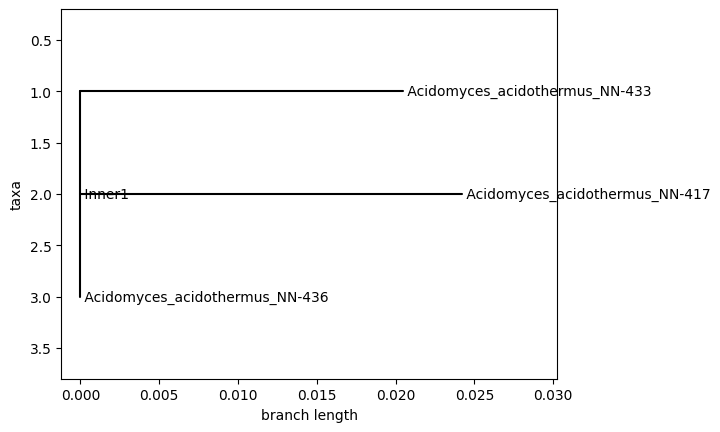

In [ ]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

align = AlignIO.read('aligned.fasta','fasta')
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
constructor = DistanceTreeConstructor()

#UPGMA
print("UPGMA")
UPGMATree = constructor.upgma(distMatrix)
Phylo.draw(UPGMATree)
#NJ
print("NJ")
NJTree = constructor.nj(distMatrix)
Phylo.draw(NJTree)